# x
# 下一种监督学习模型是核支持向量机（kernelized support vector machine）

核支持向量机（通常简称为
SVM）是可以推广到更复杂模型的扩展，这些模型无法被输入空间的超平面定义。虽然支
持向量机可以同时用于分类和回归，但我们只会介绍用于分类的情况，它在 SVC 中实现。
类似的概念也适用于支持向量回归，后者在 SVR 中实现。

Text(0, 0.5, 'Feature 1')

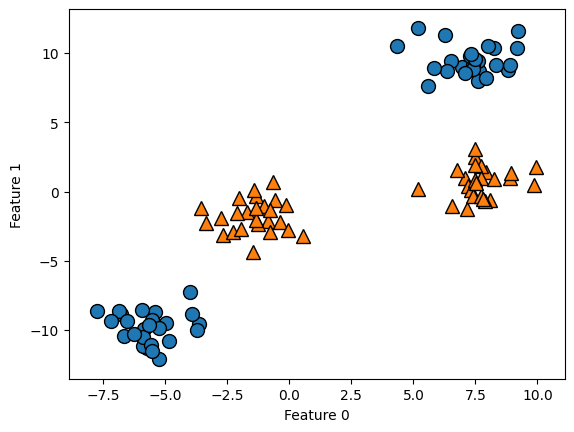

In [1]:

from matplotlib import pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

用于分类的线性模型只能用一条直线来划分数据点，对这个数据集无法给出较好的结果

Text(0, 0.5, 'Feature 1')

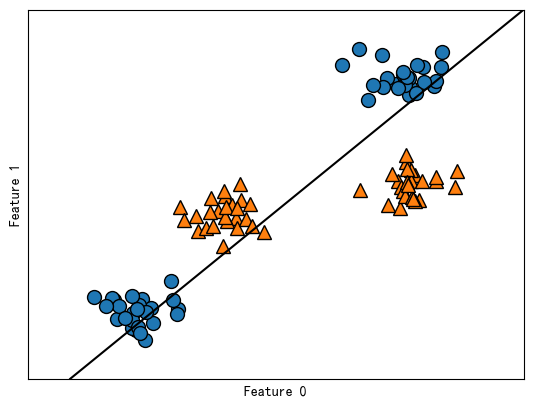

In [55]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(dual='auto').fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

们对输入特征进行扩展，比如说添加第二个特征的平方（feature1 ** 2）作为一个
新特征。现在我们将每个数据点表示为三维点 (feature0, feature1, feature1 ** 2)，而
不是二维点 (feature0, feature1)

In [56]:
import numpy as np

a = np.arange(6).reshape(3, 2)
print(a)
print(a[:, 1:])

[[0 1]
 [2 3]
 [4 5]]
[[1]
 [3]
 [5]]


C:\Users\win10\AppData\Local\Temp\ipykernel_7116\2609336959.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\win10\AppData\Local\Temp\ipykernel_7116\2609336959.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',


Text(0.5, 0, 'feature1 ** 2')

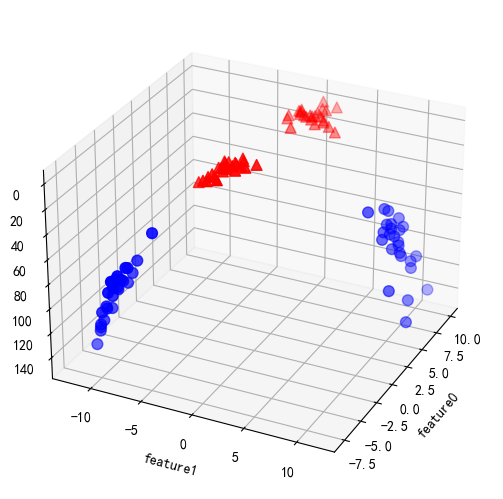

In [57]:
import numpy as np
%matplotlib inline
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

# 添加第二个特征的平方，作为一个新特征
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
# 3D可视化
# ax = Axes3D(figure, elev=-152, azim=-26)

ax = Axes3D(figure, auto_add_to_figure=False, elev=-152, azim=-26)
figure.add_axes(ax)

#  将自身添加到图像中，自3.4版本之后被弃用。
#  解决方法：https://blog.csdn.net/wzk4869/article/details/129006114?ops_request_misc=&request_id=&biz_id=102&utm_term=jupyter%203d%E5%9B%BE%E4%B8%8D%E6%98%BE%E7%A4%BA%E5%9B%BE%E7%89%87&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-129006114.142^v91^insertT0,239^v12^insert_chatgpt&spm=1018.2226.3001.4187
# 首先画出所有y == 0的点，然后画出所有y == 1的点

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")


在数据的新表示中，现在可以用线性模型（三维空间中的平面）将这两个类别分开。我们
可以用线性模型拟合扩展后的数据来验证这一点

D:\STU_DJ\pythonProject_ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\STU_DJ\pythonProject_ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\win10\AppData\Local\Temp\ipykernel_7116\1899303194.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\win10\AppData\Local\Temp\ipykernel_7116\1899303194.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',


Text(0.5, 0, 'feature1 ** 2')

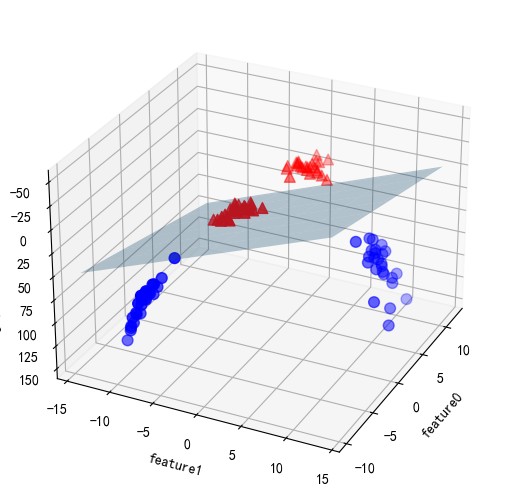

In [58]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 显示线性决策边界
figure = plt.figure()

ax = Axes3D(figure, auto_add_to_figure=False, elev=-152, azim=-26)
figure.add_axes(ax)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

如果将线性 SVM 模型看作原始特征的函数，那么它实际上已经不是线性的了。它不是一
条直线，而是一个椭圆，

Text(0, 0.5, 'Feature 1')

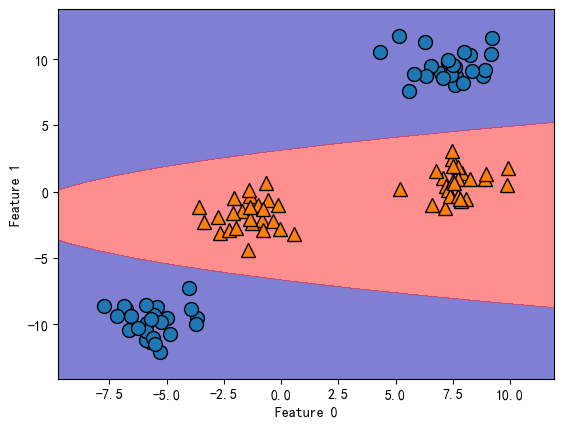

In [59]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
# 是来绘制等高线的，contour和contourf都是画三维等高线图的，不同点在于contour() 是绘制轮廓线，contourf()会填充轮廓。除非另有说明，否则两个版本的函数是相同的。
plt.contourf(XX, YY, dec.reshape(XX.shape),
             levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



  # 2. 核技巧
这里需要记住的是，向数据表示中添加非线性特征，可以让线性模型变得更强大。但是，
通常来说我们并不知道要添加哪些特征，而且添加许多特征（比如 100 维特征空间所有可
能的交互项）的计算开销可能会很大。

幸运的是，有一种巧妙的数学技巧，让我们可以在更高维空间中学习分类器，而不用实际计算可能非常大的新的数据表示。这种技巧叫作核技巧（kernel trick），它的原理是直接计算扩展特征表示中数据点之间的距离（更准确地说是内积），而不用实际对扩展进行计算。

对于支持向量机，将数据映射到更高维空间中有两种常用的方法：一种是多项式核，在一
定阶数内计算原始特征所有可能的多项式（比如 feature1 ** 2 * feature2 ** 5）；另一
种是径向基函数（radial basis function，RBF）核，也叫高斯核。高斯核有点难以解释，因
为它对应无限维的特征空间。一种对高斯核的解释是它考虑所有阶数的所有可能的多项式，但阶数越高，特征的重要性越小。

# 3. 理解SVM
在训练过程中，SVM 学习每个训练数据点对于表示两个类别之间的决策边界的重要性。通
常只有一部分训练数据点对于定义决策边界来说很重要：位于类别之间边界上的那些点。
这些点叫作支持向量（support vector），支持向量机正是由此得名。
想要对新样本点进行预测，需要测量它与每个支持向量之间的距离。分类决策是基于它与
支持向量之间的距离以及在训练过程中学到的支持向量重要性（保存在 SVC 的 dual_coef_
属性中）来做出的。

图 2-41 是支持向量机对一个二维二分类数据集的训练结果。决策边界用黑色表示，支持向
量是尺寸较大的点。下列代码将在 forge 数据集上训练 SVM 并创建此图：

Text(0, 0.5, 'Feature 1')

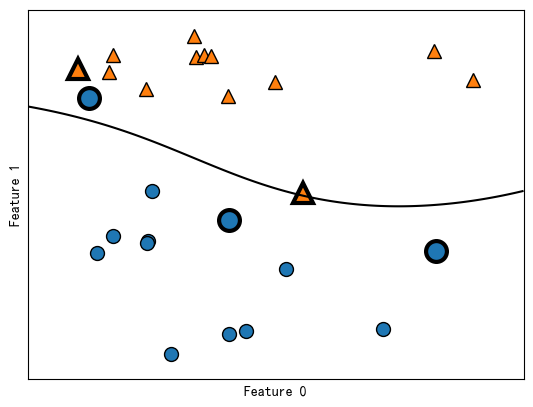

In [100]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 画出支持向量
sv = svm.support_vectors_
# 支持向量的类别标签由dual_coef_的正负号给出
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 4. SVM调参
gamma 参数是上一节给出的公式中的参数，用于控制高斯核的宽度。它决定了点与点之间
“靠近”是指多大的距离。C 参数是正则化参数，与线性模型中用到的类似。它限制每个点
的重要性（或者更确切地说，每个点的 dual_coef_）。

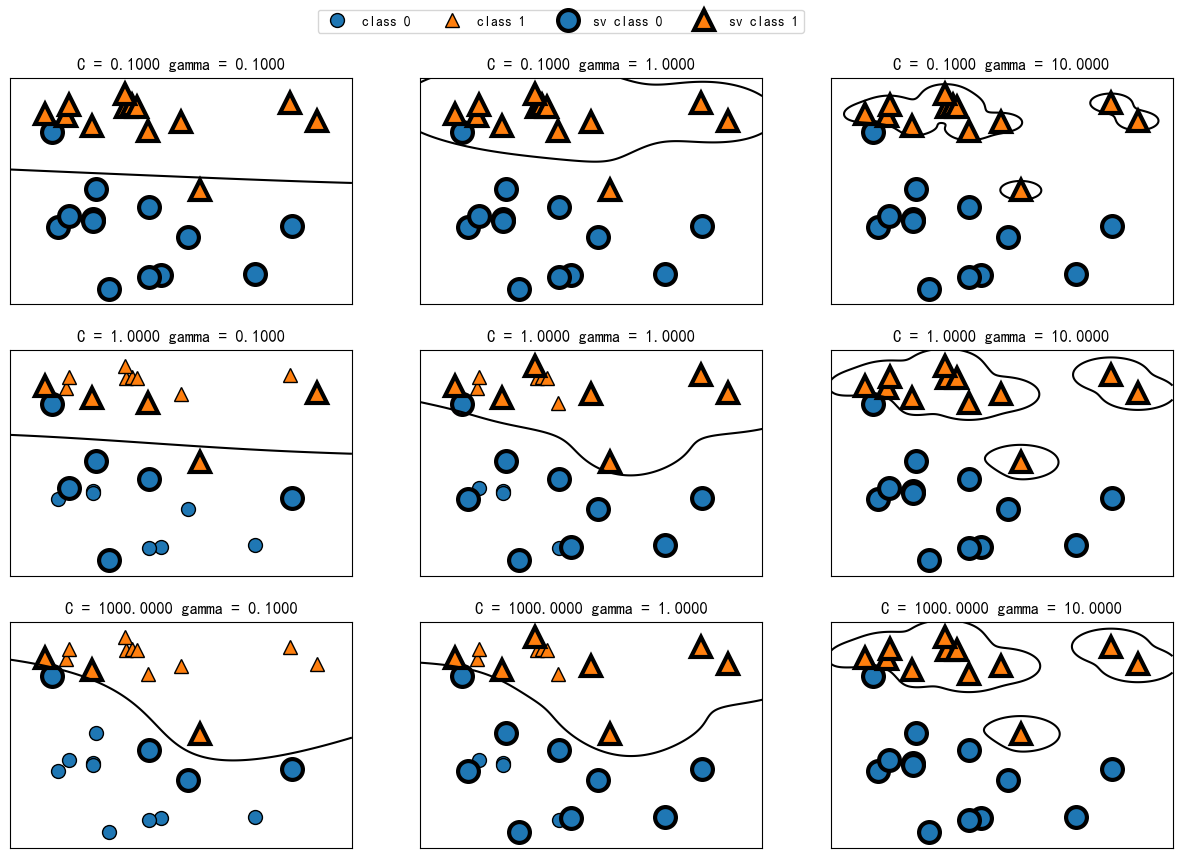

In [101]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

从左到右，我们将参数 gamma 的值从 0.1 增加到 10。gamma 较小，说明高斯核的半径较大，
许多点都被看作比较靠近。这一点可以在图中看出：左侧的图决策边界非常平滑，越向右
的图决策边界更关注单个点。小的 gamma 值表示决策边界变化很慢，生成的是复杂度较低
的模型，而大的 gamma 值则会生成更为复杂的模型。
从上到下，我们将参数 C 的值从 0.1 增加到 1000。与线性模型相同，C 值很小，说明模型
非常受限，每个数据点的影响范围都有限。你可以看到，左上角的图中，决策边界看起来
几乎是线性的，误分类的点对边界几乎没有任何影响。再看左下角的图，增大 C 之后这些
点对模型的影响变大，使得决策边界发生弯曲来将这些点正确分类。

也就是说 gamma和c越大，模型对单个点的关注越多，分类越复杂

将 RBF 核 SVM 应用到乳腺癌数据集上。默认情况下，C=1，gamma=1/n_features：

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

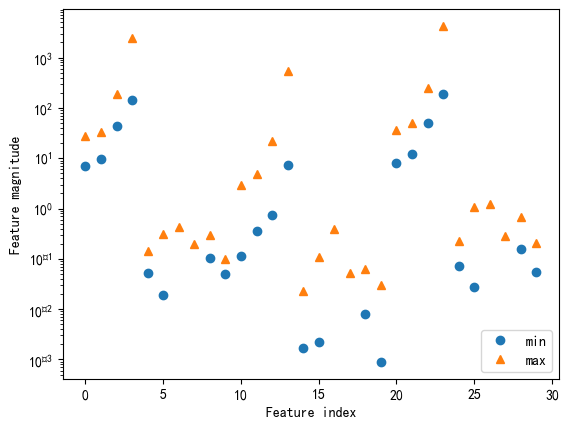

In [103]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

乳腺癌数据集的特征具有完全不同的数量级。这对其他模型来
说（比如线性模型）可能是小问题，但对核 SVM 却有极大影响。

# 5. 为SVM预处理数据
解决这个问题的一种方法就是对每个特征进行缩放，使其大致都位于同一范围。核 SVM
常用的缩放方法就是将所有特征缩放到 0 和 1 之间。我们将在第 3 章学习如何使用
MinMaxScaler 预处理方法来做到这一点，到时会给出更多细节。现在我们来“人工”做到
这一点：

In [104]:
# 计算训练集中每个特征的最小值
min_on_training = X_train.min(axis=0)
# 计算训练集中每个特征的范围（最大值-最小值）
range_on_training = (X_train - min_on_training).max(axis=0)
# 减去最小值，然后除以范围
# 这样每个特征都是min=0和max=1
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [105]:
# 利用训练集的最小值和范围对测试集做相同的变换（详见第3章）
X_test_scaled = (X_test - min_on_training) / range_on_training

In [119]:
svc = SVC(C=35)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.986


# 6. 优点、缺点和参数
核支持向量机是非常强大的模型，在各种数据集上的表现都很好。SVM 允许决策边界很
复杂，即使数据只有几个特征。它在低维数据和高维数据（即很少特征和很多特征）上的
表现都很好，但对样本个数的缩放表现不好。在有多达 10 000 个样本的数据上运行 SVM
可能表现良好，但如果数据量达到 100 000 甚至更大，在运行时间和内存使用方面可能会
面临挑战。
SVM 的另一个缺点是，预处理数据和调参都需要非常小心。这也是为什么如今很多应用
中用的都是基于树的模型，比如随机森林或梯度提升（需要很少的预处理，甚至不需要预
处理）。此外，SVM 模型很难检查，可能很难理解为什么会这么预测，而且也难以将模型
向非专家进行解释。
不过 SVM 仍然是值得尝试的，特别是所有特征的测量单位相似（比如都是像素密度）而
且范围也差不多时。
核 SVM 的重要参数是正则化参数 C、核的选择以及与核相关的参数。虽然我们主要讲的是
RBF 核，但 scikit-learn 中还有其他选择。RBF 核只有一个参数 gamma，它是高斯核宽度
的倒数。gamma 和 C 控制的都是模型复杂度，较大的值都对应更为复杂的模型。因此，这
两个参数的设定通常是强烈相关的，应该同时调节。

# 2.3.8　神经网络（深度学习）

这里只讨论一些相对简单的方法，即用于分类和回归的多层感知机（multilayer
perceptron，MLP），它可以作为研究更复杂的深度学习方法的起点。MLP 也被称为（普
通）前馈神经网络，有时也简称为神经网络。
1. 神经网络模型
MLP 可以被视为广义的线性模型，执行多层处理后得到结论。
还记得线性回归的预测公式为：
ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b
简单来说，ŷ 是输入特征 x[0] 到 x[p] 的加权求和，权重为学到的系数 w[0] 到 w[p]。我们可
以将这个公式可视化

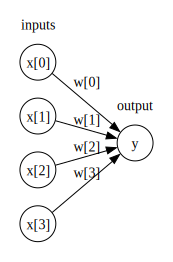

In [67]:
display(mglearn.plots.plot_logistic_regression_graph())


图中，左边的每个结点代表一个输入特征，连线代表学到的系数，右边的结点代表输出，
是输入的加权求和。
在 MLP 中，多次重复这个计算加权求和的过程，首先计算代表中间过程的隐单元（hidden
unit），然后再计算这些隐单元的加权求和并得到最终结果

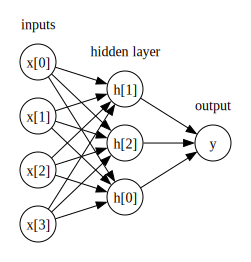

In [68]:
display(mglearn.plots.plot_single_hidden_layer_graph())

在计算完每个隐单元的加权
求和之后，对结果再应用一个非线性函数——通常是校正非线性（rectifying nonlinearity，
也叫校正线性单元或 relu）或正切双曲线（tangens hyperbolicus，tanh）。然后将这个函数
的结果用于加权求和，计算得到输出 ŷ。

Text(0, 0.5, 'relu(x), tanh(x)')

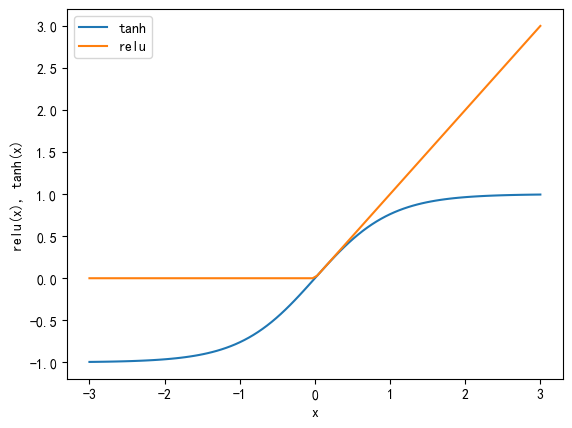

In [69]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

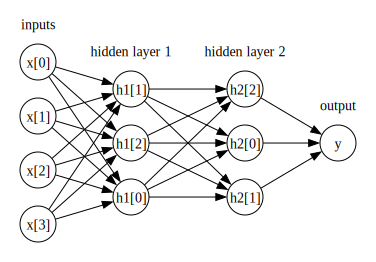

In [70]:
mglearn.plots.plot_two_hidden_layer_graph()


# 2. 神经网络调参
我们将 MLPClassifier 应用到本章前面用过的 two_moons 数据集上，以此研究 MLP 的工作
原理。结果如图 2-48 所示。

Text(0, 0.5, 'Feature 1')

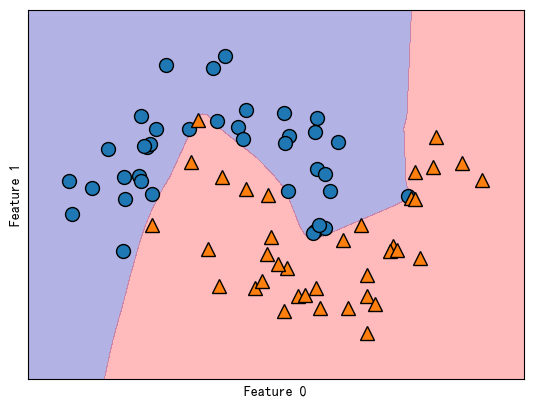

In [128]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=8)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

如你所见，神经网络学到的决策边界完全是非线性的，但相对平滑。我们用到了
solver='lbfgs'，这一点稍后会讲到。
默认情况下，MLP 使用 100 个隐结点，这对于这个小型数据集来说已经相当多了。我们可
以减少其数量（从而降低了模型复杂度），但仍然得到很好的结果

Text(0, 0.5, 'Feature 1')

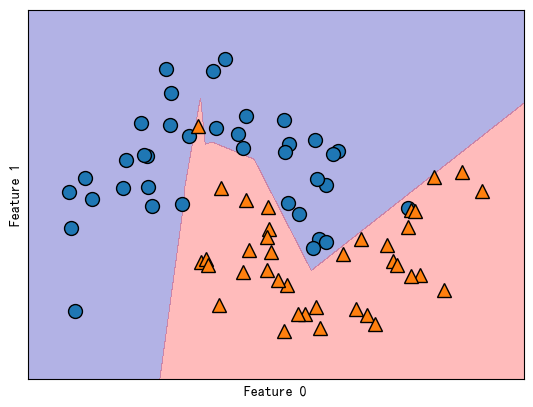

In [72]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=250)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

如果想得到更加平滑的决策
边界，可以添加更多的隐单元、
添加第二个隐层或者使用 tanh非线性

Text(0.5, 1.0, '包含 2 个隐层、每个隐层包含 10 个隐单元的神经网络学到的决策边界（激活函数为 tanh')

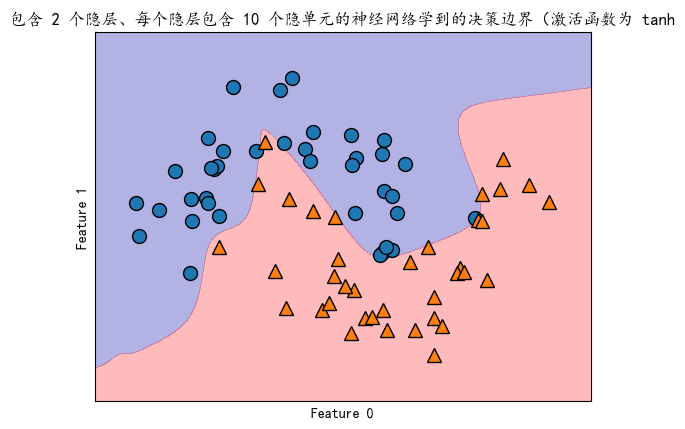

In [130]:
# 使用2个隐层，每个包含10个单元，这次使用tanh非线性
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=250)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 加了标题
plt.rcParams['font.sans-serif'] = ['kaiti']  #汉字防止出现乱码
plt.rcParams['axes.unicode_minus'] = False
plt.title("包含 2 个隐层、每个隐层包含 10 个隐单元的神经网络学到的决策边界（激活函数为 tanh")

我们还可以利用 L2 惩罚使权重趋向于 0，从而控制神经网络的复杂度，
正如我们在岭回归和线性分类器中所做的那样。
MLPClassifier 中调节 L2 惩罚的参数是 alpha（与线性回归模型中的相同），
它的默认值很小（弱正则化）。

图 2-52 显示了不同 alpha 值对 two_moons 数据集的影响，用的是 2 个隐层的神经网络，
每层包含 10 个或 100 个单元：


图 2-52：不同隐单元个数与 alpha 参数的不同设定下的决策函数：结论alpha越大，边界越复杂，隐藏层越多边界越复杂


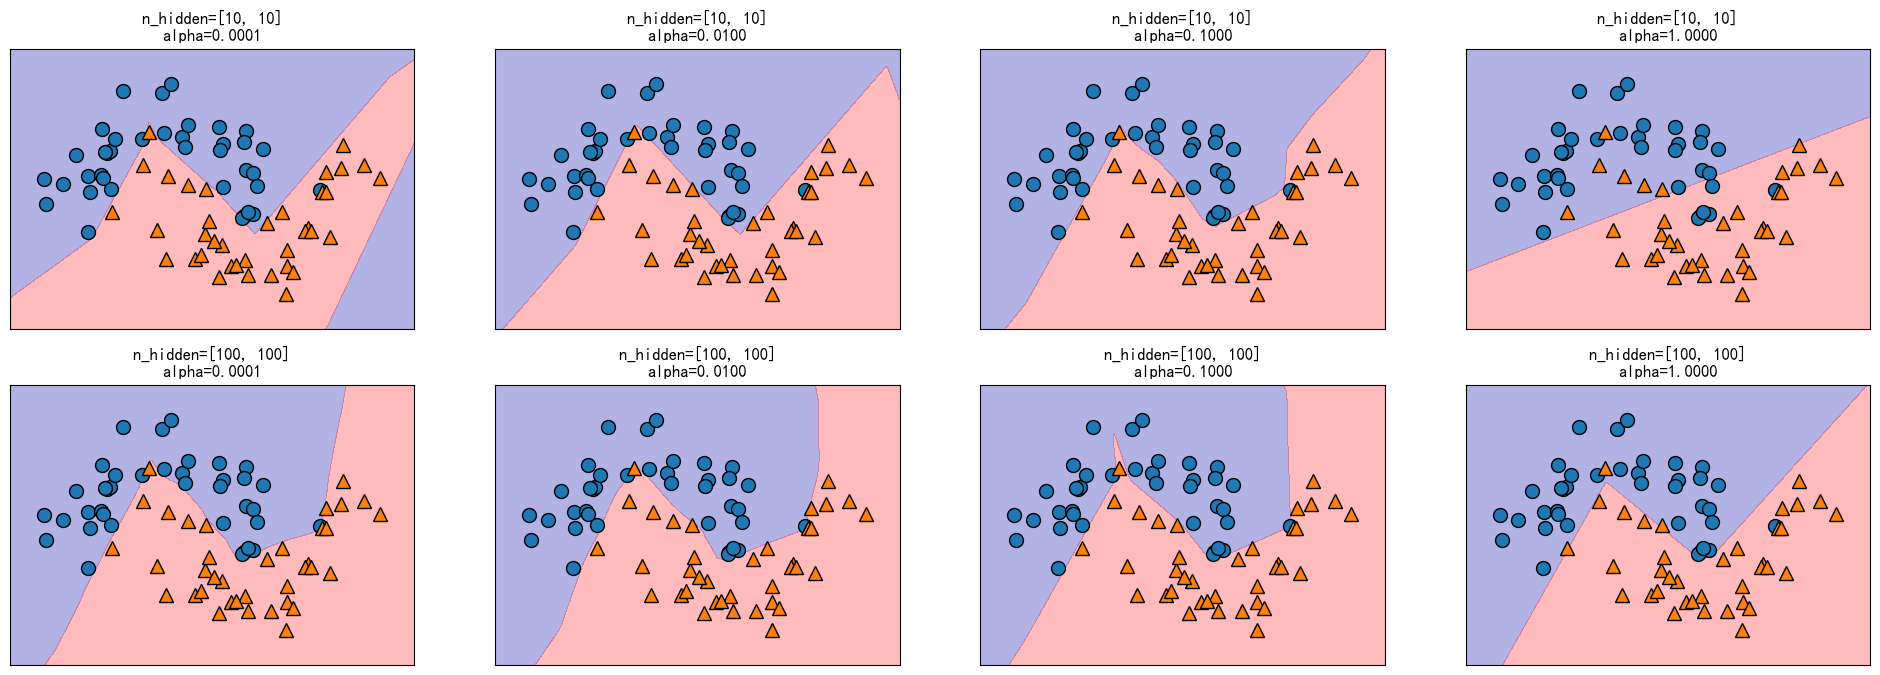

In [140]:
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=500)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3,
                                        ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))
        # 加了标题
plt.rcParams['font.sans-serif'] = ['kaiti']  #汉字防止出现乱码
plt.rcParams['axes.unicode_minus'] = False
print("图 2-52：不同隐单元个数与 alpha 参数的不同设定下的决策函数：结论alpha越大，边界越复杂，隐藏层越多边界越复杂")

随机种子

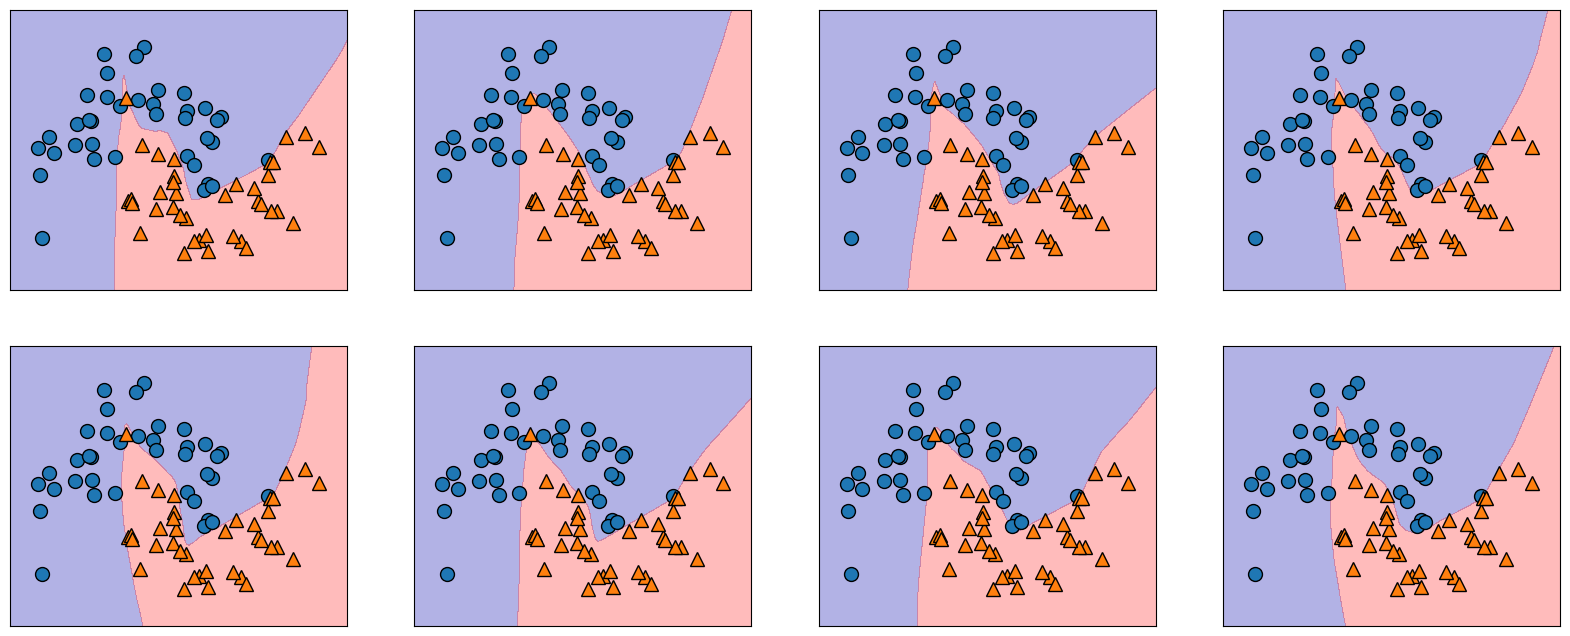

In [75]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

为了在现实世界的数据上进一步理解神经网络，我们将 MLPClassifier 应用在乳腺癌数据
集上。首先使用默认参数：

In [146]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


MLP 的精度相当好，但没有其他模型好。与较早的 SVC 例子相同，原因可能在于数据的
缩放。神经网络也要求所有输入特征的变化范围相似，最理想的情况是均值为 0、方差为
1。我们必须对数据进行缩放以满足这些要求。同样，我们这里将人工完成，但在第 3 章
将会介绍用 StandardScaler 自动完成

In [150]:
# 计算训练集中每个特征的平均值
mean_on_train = X_train.mean(axis=0)
# 计算训练集中每个特征的标准差
std_on_train = X_train.std(axis=0)
# 减去平均值，然后乘以标准差的倒数
# 如此运算之后，mean=0，std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 对测试集做相同的变换（使用训练集的平均值和标准差）
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0, max_iter=349)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


增加迭代次数仅提高了训练集性能，但没有提高泛化性能。不过模型的表现相当不错。
由于训练性能和测试性能之间仍有一些差距，所以我们可以尝试降低模型复杂度来得到更好
的泛化性能。
这里我们选择增大 alpha 参数（变化范围相当大，从 0.0001 到 1），以此向
权重添加更强的正则化：


In [151]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


添加更强的正则化好像没什么用了，前面的max_iter已经很大了，准确度已经很高

要想观察模型学到了什么，一种方法是查看模型的权重。你可以在 scikit-learn 示例库中
查看这样的一个示例（http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_
filters.html）。对于乳腺癌数据集，这可能有点难以理解。下面这张图（图 2-54）显示了连
接输入和第一个隐层之间的权重。图中的行对应 30 个输入特征，列对应 100 个隐单元。
浅色代表较大的正值，而深色代表负值。

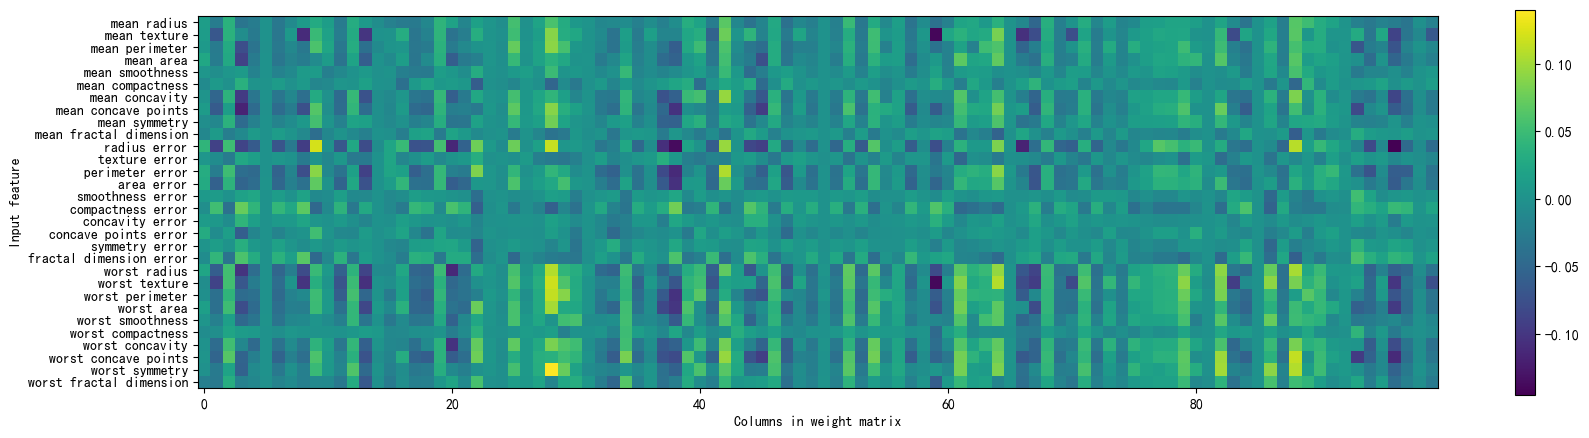

In [80]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

3. 优点、缺点和参数
在机器学习的许多应用中，神经网络再次成为最先进的模型。它的主要优点之一是能够获
取大量数据中包含的信息，并构建无比复杂的模型。给定足够的计算时间和数据，并且仔
细调节参数，神经网络通常可以打败其他机器学习算法（无论是分类任务还是回归任务）。
这就引出了下面要说的缺点。神经网络——特别是功能强大的大型神经网络——通常需要
很长的训练时间。它还需要仔细地预处理数据，正如我们这里所看到的。与 SVM 类似，
神经网络在“均匀”数据上的性能最好，其中“均匀”是指所有特征都具有相似的含义。
如果数据包含不同种类的特征，那么基于树的模型可能表现得更好。神经网络调参本身也
是一门艺术。调节神经网络模型和训练模型的方法有很多种，我们只是蜻蜓点水地尝试了
几种而已。

在我们的实验中，主要关注模型的定义：层数、每层的结点个数、正则化和非线性。这些
内容定义了我们想要学习的模型。还有一个问题是，如何学习模型或用来学习参数的算
法，这一点由 solver 参数设定。solver 有两个好用的选项。默认选项是 'adam'，在大多
数情况下效果都很好，但对数据的缩放相当敏感（因此，始终将数据缩放为均值为 0、方
差为 1 是很重要的）。另一个选项是 'lbfgs'，其鲁棒性相当好，但在大型模型或大型数据
集上的时间会比较长。还有更高级的 'sgd' 选项，许多深度学习研究人员都会用到。'sgd'
选项还有许多其他参数需要调节，以便获得最佳结果。

# 2.4　分类器的不确定度估计
我们还没有谈到 scikit-learn 接口的另一个有用之处，就是分类器能够给出预测的不确
定度估计。

scikit-learn 中有两个函数可用于获取分类器的不确定度估计：decision_function 和
predict_proba。大多数分类器（但不是全部）都至少有其中一个函数，很多分类器两个都
有。我们来构建一个 GradientBoostingClassifier 分类器（同时拥有 decision_function
和 predict_proba 两个方法），看一下这两个函数对一个模拟的二维数据集的作用：

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# 为了便于说明，我们将两个类别重命名为"blue"和"red"
y_named = np.array(["blue", "red"])[y]

# 我们可以对任意个数组调用train_test_split
# 所有数组的划分方式都是一致的
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)
# 构建梯度提升模型
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

对于二分类的情况，decision_function 返回值的形状是 (n_samples,)，为每个样本都返回
一个浮点数：

In [160]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
    gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


对于类别 1 来说，这个值表示模型对该数据点属于“正”类的置信程度。正值表示对正类
的偏好，负值表示对“反类”（其他类）的偏好：

In [161]:
# 显示decision_function的前几个元素
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]


我们可以通过仅查看决策函数的正负号来再现预测值：

对于二分类问题，“反”类始终是 classes_ 属性的第一个元素，“正”类是 classes_ 的第
二个元素。因此，如果你想要完全再现 predict 的输出，需要利用 classes_ 属性：

In [162]:
print("Thresholded decision function:\n{}".format(
    gbrt.decision_function(X_test) > 0
))
print(" predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
 predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [163]:
# 将布尔值True/False转换成0和1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
print(greater_zero)
# 利用0和1作为classes_的索引
pred = gbrt.classes_[greater_zero]

# pred与gbrt.predict的输出完全相同
print("pred is equal to predictions: {}".format(
    np.all(pred == gbrt.predict(X_test))))

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]
pred is equal to predictions: True


decision_function 可以在任意范围取值，这取决于数据与模型参数：
由于可以任意缩放，因此 decision_function 的输出往往很难解释。

In [164]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))


Decision function minimum: -7.69 maximum: 4.29


在下面的例子中，我们利用颜色编码在二维平面中画出所有点的 decision_function，还有
决策边界，后者我们之间见过。我们将训练点画成圆，将测试数据画成三角

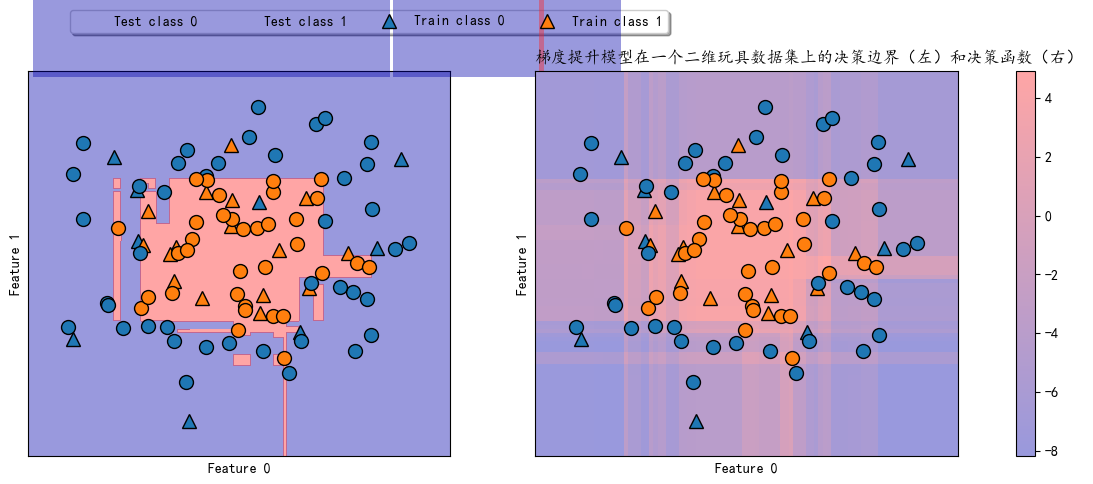

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # 画出训练点和测试点
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
plt.title("\n梯度提升模型在一个二维玩具数据集上的决策边界（左）和决策函数（右）", loc='left')
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1), shadow=True)


# 2.4.2　预测概率
predict_proba 的输出是每个类别的概率，通常比 decision_function 的输出更容易理解。
对于二分类问题，它的形状始终是 (n_samples, 2)：

In [169]:
print("Shape of probabilities:{}".format(gbrt.predict_proba(
    X_test).shape))

Shape of probabilities:(25, 2)


每行的第一个元素是第一个类别的估计概率，第二个元素是第二个类别的估计概率。由于
predict_proba 的输出是一个概率，因此总是在 0 和 1 之间，
两个类别的元素之和始终为 1：

In [167]:
# 显示predict_proba的前几个元素
print("Predicted probabilities:\n{}".format(
    gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


复杂度越低的模型通常对预测的不确定度越大。如果模型
给出的不确定度符合实际情况，那么这个模型被称为校正（calibrated）模型。在校正模型
中，如果预测有 70% 的确定度，那么它在 70% 的情况下正确。

在下面的例子中（图 2-56），我们再次给出该数据集的决策边界，以及类别 1 的类别概率：

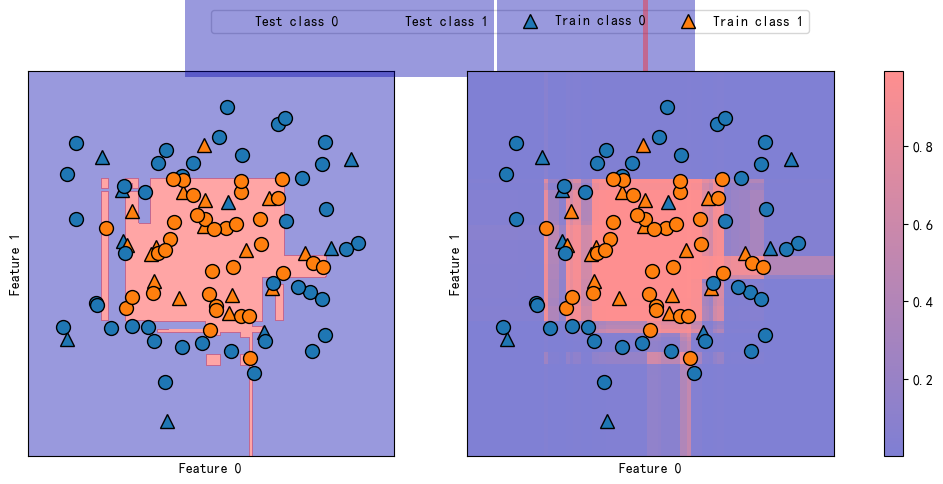

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    # 画出训练点和测试点
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.5, 1.1))

# 2.4.3　多分类问题的不确定度
到目前为止，我们只讨论了二分类问题中的不确定度估计。但 decision_function 和
predict_proba 也适用于多分类问题。我们将这两个函数应用于鸢尾花（Iris）数据集，这
是一个三分类数据集：

In [178]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [179]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# 显示决策函数的前几个元素
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


对于多分类的情况，decision_function 的形状为 (n_samples, n_classes)，每一列对应每
个类别的“确定度分数”，分数较高的类别可能性更大，得分较低的类别可能性较小。你
可以找出每个数据点的最大元素，从而利用这些分数再现预测结果：

In [181]:
print("Argmax of decision function:\n{}".format(
 np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba 输出的形状相同，也是 (n_samples, n_classes)。同样，每个数据点所有可
能类别的概率之和为 1：

In [182]:
# 显示predict_proba的前几个元素
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# 显示每行的和都是1
print("Sums:{}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums:[1. 1. 1. 1. 1. 1.]


In [183]:
print("Argmax of predicted probabilities:\n{}".format(
 np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


总 之，predict_proba 和 decision_function 的 形 状 始 终 相 同， 都 是 (n_samples, n_
classes)——除了二分类特殊情况下的 decision_function。对于二分类的情况，decision_
function 只有一列，对应“正”类 classes_[1]。这主要是由于历史原因。

如果有 n_classes 列，你可以通过计算每一列的 argmax 来再现预测结果。但如果类别
是字符串，或者是整数，但不是从 0 开始的连续整数的话，一定要小心。如果你想要对
比 predict 的结果与 decision_function 或 predict_proba 的结果，一定要用分类器的
classes_ 属性来获取真实的属性名称：

In [188]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# 用Iris数据集的类别名称来表示每一个目标值
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique  classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

unique  classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


D:\STU_DJ\pythonProject_ml\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


本章包含大量有关算法的信息，在继续阅读后续章节之前你不必记住所有这些细节。但
是，这里提到的有关模型的某些知识（以及在特定情况下使用哪种模型）对于在实践中成
功应用机器学习模型是很重要的。关于何时使用哪种模型，下面是一份快速总结。

最近邻
适用于小型数据集，是很好的基准模型，很容易解释。
线性模型
非常可靠的首选算法，适用于非常大的数据集，也适用于高维数据。

朴素贝叶斯
只适用于分类问题。比线性模型速度还快，适用于非常大的数据集和高维数据。精度通
常要低于线性模型。

决策树
速度很快，不需要数据缩放，可以可视化，很容易解释。
随机森林

几乎总是比单棵决策树的表现要好，鲁棒性很好，非常强大。不需要数据缩放。不适用
于高维稀疏数据。

梯度提升决策树
精度通常比随机森林略高。与随机森林相比，训练速度更慢，但预测速度更快，需要的
内存也更少。比随机森林需要更多的参数调节。

支持向量机
对于特征含义相似的中等大小的数据集很强大。需要数据缩放，对参数敏感。

神经网络
可以构建非常复杂的模型，特别是对于大型数据集而言。对数据缩放敏感，对参数选取
敏感。大型网络需要很长的训练时间。
